In [145]:
import pandas as pd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
import matplotlib.pyplot as plt
import numpy as np



In [163]:

df_per = pd.read_csv('~/Desktop/PerformanceMeasure.csv')
df_well = pd.read_csv('~/Desktop/WellnessMeasure.csv')
df_rpe = pd.read_csv('~/Desktop/rpe_final.csv')

print(df_per.shape)
print(df_well.shape)
print(df_rpe.shape)
df_rpe.head()

(482, 9)
(5011, 8)
(7192, 12)


,Unnamed: 0,Date,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,Load Status
0,0,2017-08-01,1,Speed,60.0,3.0,180.0,540.0,77.1,19.29,4.00,high
1,1,2017-08-01,1,Strength,90.0,4.0,360.0,540.0,77.1,19.29,4.00,high
2,2,2017-08-01,3,Speed,45.0,5.0,225.0,675.0,96.4,24.11,4.00,high
3,3,2017-08-01,3,Strength,90.0,5.0,450.0,675.0,96.4,24.11,4.00,high
4,4,2017-08-01,5,Speed,30.0,3.0,90.0,330.0,47.1,11.79,3.99,high


In [164]:

#dfPerformance = pd.merge(df_final_performance, df_games, left_on='GameID',right_on='GameID', how='left')
#dfPerformance
df_rpe.head()

,Unnamed: 0,Date,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,Load Status
0,0,2017-08-01,1,Speed,60.0,3.0,180.0,540.0,77.1,19.29,4.00,high
1,1,2017-08-01,1,Strength,90.0,4.0,360.0,540.0,77.1,19.29,4.00,high
2,2,2017-08-01,3,Speed,45.0,5.0,225.0,675.0,96.4,24.11,4.00,high
3,3,2017-08-01,3,Strength,90.0,5.0,450.0,675.0,96.4,24.11,4.00,high
4,4,2017-08-01,5,Speed,30.0,3.0,90.0,330.0,47.1,11.79,3.99,high


In [165]:
from datetime import datetime  
from datetime import timedelta

fmt = '%Y-%m-%d'
df_per["train_date"]  = (pd.to_datetime(df_per["Date"], format=fmt) - pd.Timedelta('1 days')).dt.strftime(date_format=fmt)
df_per.head()

,GameID,Date,PlayerID,AccelImpulse,AccelLoad,Speed,PerformanceScore,Outcome,PointsDiff,train_date
0,1,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,19,2017-11-29
1,2,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,31,2017-11-29
2,3,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,17,2017-11-29
3,1,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,19,2017-11-29
4,2,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,31,2017-11-29


In [173]:
df = pd.merge(df_rpe, df_per,  how='left',left_on=['Date','PlayerID'],right_on=["train_date",'PlayerID'])

In [174]:
df = df.dropna()

In [175]:
df.head()

,Unnamed: 0,Date_x,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,Load Status,GameID,Date_y,AccelImpulse,AccelLoad,Speed,PerformanceScore,Outcome,PointsDiff,train_date
2690,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,365.54,...,recovering,1.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,19.0,2017-11-29
2691,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,365.54,...,recovering,2.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,31.0,2017-11-29
2692,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,365.54,...,recovering,3.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,17.0,2017-11-29
2693,2691,2017-11-29,3,Skills,60.0,6.0,360.0,360.0,239.3,457.86,...,recovering,1.0,2017-11-30,0.452520,0.333518,0.753256,51.309794,W,19.0,2017-11-29
2694,2691,2017-11-29,3,Skills,60.0,6.0,360.0,360.0,239.3,457.86,...,recovering,2.0,2017-11-30,0.452520,0.333518,0.753256,51.309794,W,31.0,2017-11-29


In [176]:
df_final = pd.merge(df,df_well,how='left',left_on = ["train_date","PlayerID"],right_on = ["Date","PlayerID"])

In [177]:
df_final = df_final.dropna()

In [178]:
df_final.shape

(562, 28)

In [179]:
df_final.drop_duplicates()

,Unnamed: 0,Date_x,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,Outcome,PointsDiff,train_date,Date,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,EWMScore
3,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
4,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
5,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
6,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
7,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
8,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
9,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
10,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
11,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
12,2695,2017-11-29,8,Skills,60.000000,4.0,240.0,240.0,137.1,466.96,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,30.776928


In [190]:
df_final["Load Status"]

3      recovering
4      recovering
5      recovering
6      recovering
7      recovering
8      recovering
9      recovering
10     recovering
11     recovering
12     recovering
13     recovering
14     recovering
15     recovering
16     recovering
17     recovering
18     recovering
19     recovering
20     recovering
21     recovering
22     recovering
23     recovering
24     recovering
25     recovering
26     recovering
27     recovering
28     recovering
29     recovering
30     recovering
31     recovering
32     recovering
          ...    
540    recovering
541        normal
542        normal
543        normal
544        normal
545    recovering
546    recovering
547    recovering
548    recovering
549    recovering
550    recovering
551    recovering
552    recovering
553    recovering
554    recovering
555    recovering
556    recovering
557    recovering
558    recovering
559    recovering
560    recovering
561    recovering
562    recovering
563    recovering
564    rec

In [200]:
df_final.drop(columns=["Date_x","Date"])
df_final.rename(columns = {"Date_y":"game_date",'Load Status':"Load_Status"},inplace=True)
df_final.columns

Index(['Unnamed: 0', 'Date_x', 'PlayerID', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'Load_Status', 'GameID', 'game_date',
       'AccelImpulse', 'AccelLoad', 'Speed', 'PerformanceScore', 'Outcome',
       'PointsDiff', 'train_date', 'Date', 'Pain', 'Illness', 'Menstruation',
       'Nutrition', 'NutritionAdjustment', 'EWMScore'],
      dtype='object')

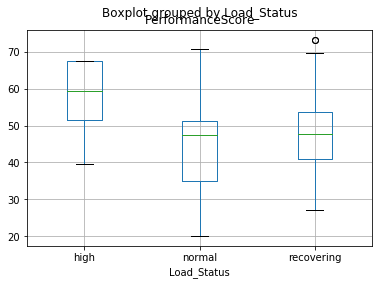

In [201]:
df_final.boxplot(column = 'PerformanceScore', by = "Load_Status")

In [184]:
df_final.to_csv("~/Desktop/final_data.csv")

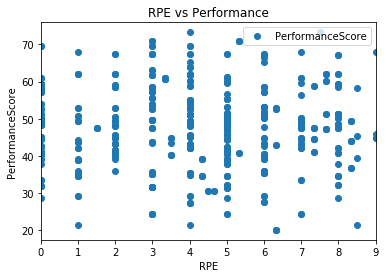

In [99]:
df_final.plot(x='RPE', y='PerformanceScore', style='o') 
plt.title('RPE vs Performance')  
plt.xlabel('RPE')  
plt.ylabel('PerformanceScore')  
plt.show()

In [188]:
df_final

,Unnamed: 0,Date_x,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,Outcome,PointsDiff,train_date,Date,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,EWMScore
3,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
4,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
5,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
6,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
7,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
8,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
9,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
10,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
11,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
12,2695,2017-11-29,8,Skills,60.000000,4.0,240.0,240.0,137.1,466.96,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,30.776928


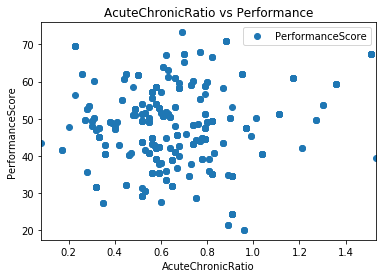

In [101]:
df_final.plot(x='AcuteChronicRatio', y='PerformanceScore', style='o') 
plt.title('AcuteChronicRatio vs Performance')  
plt.xlabel('AcuteChronicRatio')  
plt.ylabel('PerformanceScore')  
plt.show()

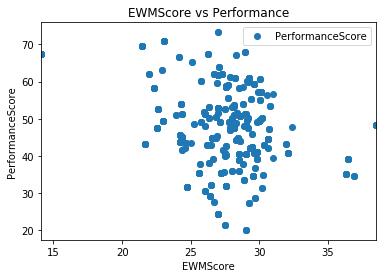

In [102]:

df_final.plot(x='EWMScore', y='PerformanceScore', style='o') 
plt.title('EWMScore vs Performance')  
plt.xlabel('EWMScore')  
plt.ylabel('PerformanceScore')  
plt.show()

In [202]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = "PerformanceScore  ~  Load_Status + EWMScore + RPE + SessionType + Pain + Illness +Menstruation +  PointsDiff + AcuteChronicRatio+ Outcome + NutritionAdjustment"
full_model = smf.ols(formula, data = df_final).fit()
print(full_model.summary())



                            OLS Regression Results                            
Dep. Variable:       PerformanceScore   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     7.941
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           9.35e-19
Time:                        17:56:41   Log-Likelihood:                -2068.3
No. Observations:                 562   AIC:                             4175.
Df Residuals:                     543   BIC:                             4257.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [203]:
formula = "PerformanceScore  ~  Load_Status + EWMScore + Pain + Illness + PointsDiff + AcuteChronicRatio+ Outcome "
model4 = smf.ols(formula, data = df_final).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:       PerformanceScore   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     15.42
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           1.55e-22
Time:                        17:57:04   Log-Likelihood:                -2071.0
No. Observations:                 562   AIC:                             4162.
Df Residuals:                     552   BIC:                             4205.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [204]:
formula = "PerformanceScore  ~ Load_Status+ EWMScore + Pain + Illness + PointsDiff + AcuteChronicRatio "
model5 = smf.ols(formula, data = df_final).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:       PerformanceScore   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     16.80
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           2.08e-22
Time:                        17:57:15   Log-Likelihood:                -2072.8
No. Observations:                 562   AIC:                             4164.
Df Residuals:                     553   BIC:                             4203.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

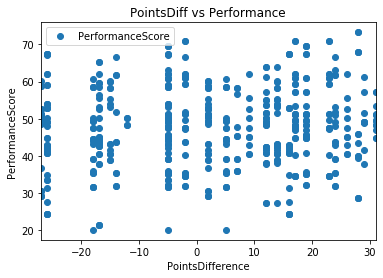

In [119]:

df_final.plot(x='PointsDiff', y='PerformanceScore', style='o') 
plt.title('PointsDiff vs Performance')  
plt.xlabel('PointsDifference')  
plt.ylabel('PerformanceScore')  
plt.show()

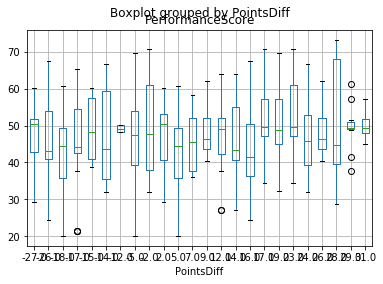

In [122]:
df_final.boxplot(column = 'PerformanceScore', by = "PointsDiff")

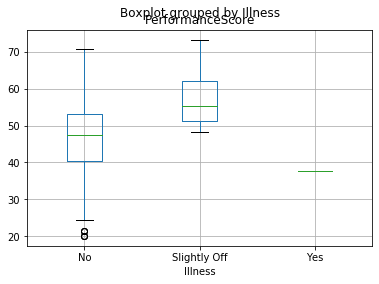

In [123]:
df_final.boxplot(column = 'PerformanceScore', by = "Illness")

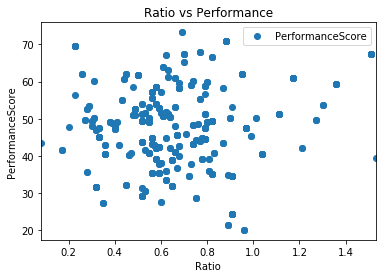

In [128]:
df_final.plot(x='AcuteChronicRatio', y='PerformanceScore', style='o') 
plt.title('Ratio vs Performance')  
plt.xlabel('Ratio')  
plt.ylabel('PerformanceScore')

# poly1d_fn is now a function which takes in x and returns an estimate for y


plt.show()

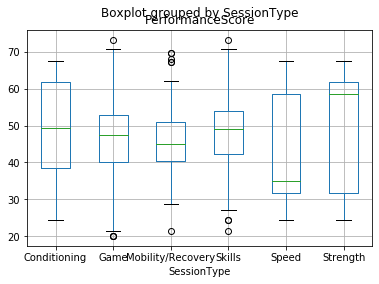

In [129]:
df_final.boxplot(column = 'PerformanceScore', by = "SessionType")

Mixed Effect Model

Since we have multiple rows for same player, these are dependent

Using Mixed effect models can avoid it

Reference: https://www.statsmodels.org/stable/mixed_linear.html

In [205]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

md = smf.mixedlm("PerformanceScore  ~ Load_Status + EWMScore + Pain + Illness + PointsDiff + AcuteChronicRatio ", df_final,groups = df_final["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     562       Method:               REML            
No. Groups:           17        Scale:                62.0709         
Min. group size:      3         Likelihood:           -1972.0577      
Max. group size:      80        Converged:            Yes             
Mean group size:      33.1                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  61.143    6.959  8.787 0.000  47.504 74.781
Load_Status[T.normal]      -6.320    2.477 -2.551 0.011 -11.175 -1.465
Load_Status[T.recovering]  -4.528    3.000 -1.510 0.131 -10.408  1.351
Pain[T.Yes]                 3.648    1.885  1.936 0.053  -0.045  7.342
Illness[T.Slightly Off]

In [206]:
md = smf.mixedlm("PerformanceScore  ~  Load_Status + EWMScore + RPE + Pain + Illness +Menstruation + PointsDiff + AcuteChronicRatio+ Outcome ", df_final,groups = df_final["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     562       Method:               REML            
No. Groups:           17        Scale:                61.7895         
Min. group size:      3         Likelihood:           -1967.8803      
Max. group size:      80        Converged:            Yes             
Mean group size:      33.1                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  62.895    7.071  8.894 0.000  49.036 76.755
Load_Status[T.normal]      -6.080    2.475 -2.456 0.014 -10.931 -1.229
Load_Status[T.recovering]  -4.056    3.004 -1.350 0.177  -9.943  1.832
Pain[T.Yes]                 3.530    1.886  1.872 0.061  -0.166  7.226
Illness[T.Slightly Off]

In [207]:
md = smf.mixedlm("PerformanceScore  ~  Load_Status + EWMScore +  Pain + Illness + PointsDiff + AcuteChronicRatio+ Outcome ", df_final,groups = df_final["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     562       Method:               REML            
No. Groups:           17        Scale:                61.6409         
Min. group size:      3         Likelihood:           -1968.3751      
Max. group size:      80        Converged:            Yes             
Mean group size:      33.1                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  63.224    6.991  9.043 0.000  49.521 76.927
Load_Status[T.normal]      -6.159    2.469 -2.494 0.013 -10.999 -1.320
Load_Status[T.recovering]  -4.215    2.992 -1.409 0.159 -10.080  1.649
Pain[T.Yes]                 3.644    1.878  1.941 0.052  -0.036  7.325
Illness[T.Slightly Off]

In [208]:
md = smf.mixedlm("PerformanceScore  ~  Load_Status +  EWMScore +  Pain + Illness + PointsDiff + Outcome ", df_final,groups = df_final["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     562       Method:               REML            
No. Groups:           17        Scale:                61.5289         
Min. group size:      3         Likelihood:           -1970.3091      
Max. group size:      80        Converged:            Yes             
Mean group size:      33.1                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  64.223    6.041 10.631 0.000  52.383 76.063
Load_Status[T.normal]      -6.529    2.098 -3.113 0.002 -10.640 -2.418
Load_Status[T.recovering]  -4.864    1.939 -2.509 0.012  -8.663 -1.064
Pain[T.Yes]                 3.599    1.870  1.925 0.054  -0.065  7.264
Illness[T.Slightly Off]

In [141]:
df_final.columns

Index(['Date_x', 'PlayerID', 'SessionType', 'Duration', 'RPE', 'SessionLoad',
       'DailyLoad', 'AcuteLoad', 'AcuteChronicRatio', 'GameID', 'Date_y',
       'AccelImpulse', 'AccelLoad', 'Speed', 'PerformanceScore', 'Outcome',
       'PointsDiff', 'train_date', 'Date', 'Pain', 'Illness', 'Menstruation',
       'Nutrition', 'NutritionAdjustment', 'EWMScore'],
      dtype='object')

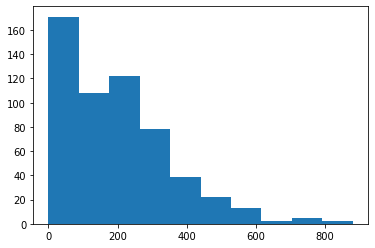

In [143]:
a = plt.hist(df_final['SessionLoad'],bins = 10)
plt.show()